## Clustering

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.cluster import cluster_visualizer # pip install pyclustering

### K-Medoids

In [2]:
iris = datasets.load_iris()

#### Model

In [3]:
# Diffuse Partial Grouping
cluster = kmedoids(iris.data[:, 0:2], [3, 12, 20])
cluster.get_medoids()

[3, 12, 20]

In [4]:
cluster.process() # fit

In [5]:
predictions = cluster.get_clusters()
print(predictions)

[[7, 0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 106], [67, 53, 55, 57, 59, 60, 61, 62, 63, 64, 66, 68, 69, 70, 71, 72, 73, 78, 79, 80, 81, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101, 113, 114, 119, 121, 123, 126, 127, 133, 134, 138, 142, 146, 149], [112, 50, 51, 52, 54, 56, 58, 65, 74, 75, 76, 77, 86, 100, 102, 103, 104, 105, 107, 108, 109, 110, 111, 115, 116, 117, 118, 120, 122, 124, 125, 128, 129, 130, 131, 132, 135, 136, 137, 139, 140, 141, 143, 144, 145, 147, 148]]


In [8]:
medoids = cluster.get_medoids()
print(medoids)

[7, 67, 112]


##### Clusters Preview

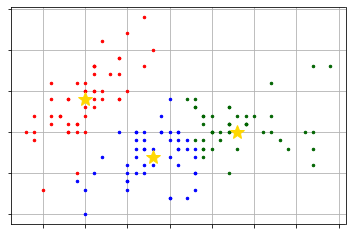

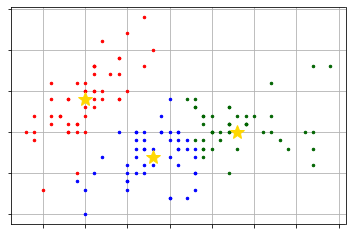

In [12]:
view = cluster_visualizer()
view.append_clusters(predictions, iris.data[:, 0:2])
view.append_cluster(medoids, iris.data[:, 0:2], marker='*', markersize=15)
view.show()

#### Comparative

In [13]:
true_class_list = []
predictions_list = []

for i in range(len(predictions)):
    # i = class iris
    for j in range(len(predictions[i])):
        # j = instance index
        predictions_list.append(i)
        true_class_list.append(iris.target[predictions[i][j]])

In [14]:
true_class_list = np.asarray(true_class_list)
predictions_list = np.asarray(predictions_list)

##### Confusion Matrix

In [15]:
confusion = confusion_matrix(true_class_list, predictions_list)
print(confusion)


[[50  0  0]
 [ 0 38 12]
 [ 1 14 35]]
